In [1]:
import os
import sagemaker
from sagemaker import get_execution_role
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sagemaker_session=sagemaker.Session()
role=get_execution_role()
role # testing

'arn:aws:iam::882749673167:role/service-role/AmazonSageMaker-ExecutionRole-20220207T003718'

In [3]:
region=sagemaker_session.boto_session.region_name
region

'ap-south-1'

In [4]:
training_data_uri='s3://sagemaker-sample-data-{}/tensorflow/mnist'.format(region)

In [5]:
# download MNIST dataset in the format .npy into local sagemaker machine 
# in this example they copy handwritten digit images to lcoal machine
get_ipython().system('aws --region {region} s3 \
                    cp s3://sagemaker-sample-data-{region}/tensorflow/mnist/train_data.npy train_data.npy')
# below command copies labels associated with each images
get_ipython().system('aws --region {region} s3 \
                    cp s3://sagemaker-sample-data-{region}/tensorflow/mnist/train_labels.npy train_labels.npy')

download: s3://sagemaker-sample-data-ap-south-1/tensorflow/mnist/train_data.npy to ./train_data.npy
download: s3://sagemaker-sample-data-ap-south-1/tensorflow/mnist/train_labels.npy to ./train_labels.npy


In [6]:
train_data=np.load('train_data.npy')
train_labels=np.load('train_labels.npy')

In [7]:
train_data.shape,train_labels.shape

((55000, 784), (55000,))

This is a 7


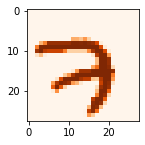

This is a 3


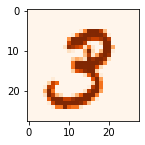

This is a 4


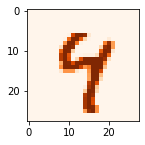

This is a 6


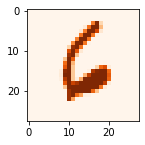

This is a 1


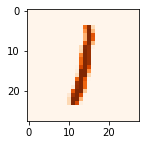

This is a 8


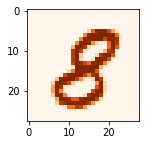

This is a 1


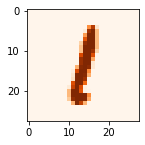

This is a 0


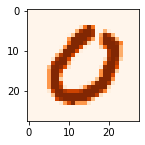

This is a 9


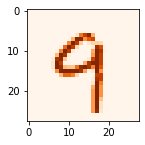

This is a 8


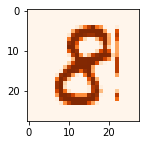

In [8]:
%matplotlib inline

plt.rcParams["figure.figsize"]=(2,10)

for i in range(0,10):
    img=train_data[i]
    label=train_labels[i]
    img_reshape=img.reshape((-28,28)) # reshaping the image to 28x28 pixels
    imgplot=plt.imshow(img_reshape,cmap='Oranges')
    print(f'This is a {label}')
    plt.show() #show MNIST handwritten dataset 
